In [1]:
#This program generates FIG. 2A, 2B, 2C
#Fig2: Mean firing rates in the spontanous and feedforward conditions.
#Fig2A: Perturabtion matrix in the spontaneous condition
#Fig2B: Perturabtion matrix in the feedforward condition
#Fig2C: Comparison Perturabtion matrix in the feedforward condition and spontaneous

In [2]:
#Import some libraries 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import seaborn as sns
from matplotlib.colors import LogNorm, Normalize

In [3]:
#Importing some info I need 
runtime=np.loadtxt("../general_files/runtime.txt")*1000 #Runtime of the simulations

#Number of neurons for each type in each of the 4 layers
N= (np.loadtxt("../general_files/N.txt").reshape(4, 4)).astype(int)
Ntot=5000
#In layer 1: 
N1=int(0.0192574218*Ntot)
#print(N1)

#Print Some information about the mdodel
print("The corticular column in this model is composed by layer 2/3,4,5,6 and layer 1")
print("Total number of neurons in the column: %s + %s \n85 perc excitatory and 15 perc inhibitory \nIn each layer: 1 excitotory population and 3 inhibitory populations: pv, sst and vip cells.   "%(Ntot,N1))
print("Number of neurons for each type in each of the 4 layers:")
print(N)
print("The order is from left to right: E, PV, SST, VIP. From top to bottom: 2/3,4,5,6")


The corticular column in this model is composed by layer 2/3,4,5,6 and layer 1
Total number of neurons in the column: 5000 + 96 
85 perc excitatory and 15 perc inhibitory 
In each layer: 1 excitotory population and 3 inhibitory populations: pv, sst and vip cells.   
Number of neurons for each type in each of the 4 layers:
[[1236   65   47  107]
 [1010   98   53   27]
 [ 741   63   56   11]
 [1263  102  102   19]]
The order is from left to right: E, PV, SST, VIP. From top to bottom: 2/3,4,5,6


In [4]:
#------------------------------------------------------------------------------
# Import the files 
#------------------------------------------------------------------------------

#This funciton takes the name of the folder and import all the spike data 
#The function returns the number of spikes for each group of neurons 

def take_files(a):
    
    #layer1
    S_vip1num_spikes=np.array(np.loadtxt(a+'/S_vip1numspike.txt') )

    #layer23
    S_e23num_spikes=np.array(np.loadtxt(a+'/S_e23numspike.txt') )
    S_pv23num_spikes=np.array(np.loadtxt(a+'/S_pv23numspike.txt') )
    S_sst23num_spikes=np.array(np.loadtxt(a+'/S_sst23numspike.txt') )
    S_vip23num_spikes=np.array(np.loadtxt(a+'/S_vip23numspike.txt') )

    #layer4
    S_e4num_spikes=np.array(np.loadtxt(a+'/S_e4numspike.txt') )
    S_pv4num_spikes=np.array(np.loadtxt(a+'/S_pv4numspike.txt') )
    S_sst4num_spikes=np.array(np.loadtxt(a+'/S_sst4numspike.txt') )
    S_vip4num_spikes=np.array(np.loadtxt(a+'/S_vip4numspike.txt') )

    #layer5
    S_e5num_spikes=np.array(np.loadtxt(a+'/S_e5numspike.txt') )
    S_pv5num_spikes=np.array(np.loadtxt(a+'/S_pv5numspike.txt') )
    S_sst5num_spikes=np.array(np.loadtxt(a+'/S_sst5numspike.txt') )
    S_vip5num_spikes=np.array(np.loadtxt(a+'/S_vip5numspike.txt') )

    #layer6
    S_e6num_spikes=np.array(np.loadtxt(a+'/S_e6numspike.txt') )
    S_pv6num_spikes=np.array(np.loadtxt(a+'/S_pv6numspike.txt') )
    S_sst6num_spikes=np.array(np.loadtxt(a+'/S_sst6numspike.txt') )
    S_vip6num_spikes=np.array(np.loadtxt(a+'/S_vip6numspike.txt') ) 
    
    return S_vip1num_spikes,S_e4num_spikes,S_pv4num_spikes,S_sst4num_spikes,S_vip4num_spikes,S_e5num_spikes,S_pv5num_spikes,S_sst5num_spikes,S_vip5num_spikes, S_e6num_spikes,S_pv6num_spikes,S_sst6num_spikes,S_vip6num_spikes,S_e23num_spikes,S_pv23num_spikes,S_sst23num_spikes,S_vip23num_spikes

In [5]:
#------------------------------------------------------------------------------
# Compute the rates for all the neuron groups 
#------------------------------------------------------------------------------

#Funciton to compute the mean firing rates for all the neuron groups given the number spikes 
def compute_FR(N,N1,runtime,S_vip1num_spikes,
              S_e4num_spikes,S_pv4num_spikes,S_sst4num_spikes,S_vip4num_spikes,
              S_e5num_spikes,S_pv5num_spikes,S_sst5num_spikes,S_vip5num_spikes,
              S_e6num_spikes,S_pv6num_spikes,S_sst6num_spikes,S_vip6num_spikes,
             S_e23num_spikes,S_pv23num_spikes,S_sst23num_spikes,S_vip23num_spikes):

    #runtime must be in seconds (it is in ms now)
    runtime=runtime/1000
    tot_sp_vip1 =  S_vip1num_spikes  #Layer 2/3
    rate_vip1= tot_sp_vip1/(N1*runtime)

    print("runtime: %s" %runtime)
    tot_sp_e23 =  S_e23num_spikes  #Layer 2/3
    #print(tot_sp_e23)
    #print(tot_sp_e23)
    #print(N[0][0])
    # Total number of spikes and rate for each group:
    rate_e23= tot_sp_e23/(N[0][0]*runtime)
    tot_sp_pv23 =  S_pv23num_spikes
    rate_pv23= tot_sp_pv23/(N[0][1]*runtime)
    tot_sp_sst23 =  S_sst23num_spikes
    rate_sst23= tot_sp_sst23/(N[0][2]*runtime)
    tot_sp_vip23 =  S_vip23num_spikes
    rate_vip23= tot_sp_vip23/(N[0][3]*runtime)
    #print(tot_sp_vip23)

    tot_sp_e4 =  S_e4num_spikes
    rate_e4= tot_sp_e4/(N[1][0]*runtime)
    tot_sp_pv4 =  S_pv4num_spikes
    rate_pv4= tot_sp_pv4/(N[1][1]*runtime)
    tot_sp_sst4 =  S_sst4num_spikes
    rate_sst4= tot_sp_sst4/(N[1][2]*runtime)
    tot_sp_vip4 =  S_vip4num_spikes
    rate_vip4= tot_sp_vip4/(N[1][3]*runtime)

    tot_sp_e5 =  S_e5num_spikes
    rate_e5= tot_sp_e5/(N[2][0]*runtime)
    tot_sp_pv5 =  S_pv5num_spikes
    rate_pv5= tot_sp_pv5/(N[2][1]*runtime)
    tot_sp_sst5 =  S_sst5num_spikes
    rate_sst5= tot_sp_sst5/(N[2][2]*runtime)
    tot_sp_vip5 =  S_vip5num_spikes
    rate_vip5= tot_sp_vip5/(N[2][3]*runtime)


    tot_sp_e6 =  S_e6num_spikes
    rate_e6= tot_sp_e6/(N[3][0]*runtime)
    tot_sp_pv6 =  S_pv6num_spikes
    rate_pv6= tot_sp_pv6/(N[3][1]*runtime)
    tot_sp_sst6 =  S_sst6num_spikes
    rate_sst6= tot_sp_sst6/(N[3][2]*runtime)
    tot_sp_vip6 =  S_vip6num_spikes
    rate_vip6= tot_sp_vip6/(N[3][3]*runtime)
    
    print("-----------------------Computing the firing rates--------------------------------")
    print('rate_vip1: %f'%(rate_vip1))
    print('rate_e23: %f rate_pv23: %f rate_sst23: %f rate_vip23: %f'%(rate_e23,rate_pv23,rate_sst23,rate_vip23))
    print('rate_e4: %f rate_pv4: %f rate_sst4: %f rate_vip4: %f'%(rate_e4,rate_pv4,rate_sst4,rate_vip4))
    print('rate_e5: %f rate_pv5: %f rate_sst5: %f rate_vip5: %f'%(rate_e5,rate_pv5,rate_sst5,rate_vip5))
    print('rate_e6: %f rate_pv6: %f rate_sst6: %f rate_vip6: %f'%(rate_e6,rate_pv6,rate_sst6,rate_vip6))
    
    return rate_e23,rate_pv23,rate_sst23,rate_vip23,rate_e4,rate_pv4,rate_sst4,rate_vip4,rate_e5,rate_pv5,rate_sst5,rate_vip5,rate_e6,rate_pv6,rate_sst6,rate_vip6


In [10]:
#Define the files containing the needed data 

#This is for the Spontanous case (Fig 2A)
#folder_state='../simulations_data/In_spontaneuous/i_none/Sp_0'
#folder_input='../simulations_data/In_spontaneuous/i16/Sp_1'

#This is for the FF case (Fig 2B)
# folder_state='../simulations_data/In_with_e4/i_input4/Sp_1'
# folder_input='../simulations_data/In_with_e4/i1/Sp_1'



#folder_input='../simulations_data/Sp_input_ff25_5pv_150' #FF input              #Fig. 1D
#folder_input='../simulations_data/Sp_input_ff25_5pv_170' #FF input              #Fig. 1D
#folder_input='../simulations_data/Sp_input_fb25_5pv_170' #FF input              #Fig. 1D


#SPONTANOUS with and without probability changed
#folder_state='../simulations_data/REVISIONS/Sp_input_e4_0pA_e5_0pA'
#folder_state='../simulations_data/REVISIONS/Sp_input_probChanged0.6_e4_0pA25%_e5_0pA_25%'
#folder_state='../simulations_data/REVISIONS/Sp_input_probChanged1.4_e4_0pA100%_e5_0pA_25%'


#EVOKED with and without probability changed

#folder_state='../simulations_data/REVISIONS/Sp_input_e4_30pA100%_e5_0pA_25%'
#folder_state='../simulations_data/REVISIONS/Sp_input_probChanged0.6_e4_30pA100%_e5_0pA_25%'

#Evoked 150 to 25%
#folder_state='../simulations_data/REVISIONS/Sp_input_e4_150pA25%_e5_0pA_25%'


#folder_state='../simulations_data/REVISIONS/Sp_input_probChanged60_e4_30pA100%_e5_0pA_25%' #FF 

#REVISIONS_1 #final simulations 
folder_state = "../simulations_data/REVISIONS_1/Sp_input_e4_0pA_e5_0pA_e23_0pA_e6_0pA" #spont
# folder_state = "../simulations_data/REVISIONS_1/Sp_input_e4_0pA_e5_0pA_e23_0pA_e6_150pA" #input L6
# folder_state = "../simulations_data/REVISIONS_1/Sp_input_e4_0pA_e5_0pA_e23_150pA_e6_0pA" #input L2/3
# folder_state = "../simulations_data/REVISIONS_1/Sp_input_e4_0pA_e5_150pA_e23_0pA_e6_0pA" #input L5
# folder_state = "../simulations_data/REVISIONS_1/Sp_input_e4_0pA_e5_150pA_e23_150pA_e6_0pA" #input L5, L2/3
# folder_state = "../simulations_data/REVISIONS_1/Sp_input_e4_0pA_e5_150pA_e23_150pA_e6_150pA" #input L5, L2/3, L6
# folder_state = "../simulations_data/REVISIONS_1/Sp_input_e4_150pA_e5_0pA_e23_0pA_e6_0pA" #input to L4
# folder_state = "../simulations_data/REVISIONS_1/Sp_input_e4_150pA25%_e5_150pA_25%" #input to L4 & L5 



folder_input = "../simulations_data/REVISIONS_1/Sim_e4_0pA_e5_0pA_e23_0pA_e6_0pA/e23" #spont


In [11]:
# Import the files in which no input is given, spontaneous activity 
S_vip1num_spikes_0,S_e4num_spikes_0,S_pv4num_spikes_0,S_sst4num_spikes_0,S_vip4num_spikes_0,S_e5num_spikes_0,S_pv5num_spikes_0,S_sst5num_spikes_0,S_vip5num_spikes_0,S_e6num_spikes_0,S_pv6num_spikes_0,S_sst6num_spikes_0,S_vip6num_spikes_0,S_e23num_spikes_0,S_pv23num_spikes_0,S_sst23num_spikes_0,S_vip23num_spikes_0=take_files(folder_state)

#Compute the mean firing rates for all the populations
rate_e23_0,rate_pv23_0,rate_sst23_0,rate_vip23_0,rate_e4_0,rate_pv4_0,rate_sst4_0,rate_vip4_0,rate_e5_0,rate_pv5_0,rate_sst5_0,rate_vip5_0,rate_e6_0,rate_pv6_0,rate_sst6_0,rate_vip6_0=compute_FR(N,N1,runtime,
S_vip1num_spikes_0,S_e4num_spikes_0,S_pv4num_spikes_0,S_sst4num_spikes_0,
S_vip4num_spikes_0,S_e5num_spikes_0,S_pv5num_spikes_0,S_sst5num_spikes_0,
S_vip5num_spikes_0,S_e6num_spikes_0,S_pv6num_spikes_0,S_sst6num_spikes_0,
S_vip6num_spikes_0,S_e23num_spikes_0,S_pv23num_spikes_0,S_sst23num_spikes_0,S_vip23num_spikes_0)

runtime: 3.0
-----------------------Computing the firing rates--------------------------------
rate_vip1: 0.993056
rate_e23: 0.268608 rate_pv23: 2.907692 rate_sst23: 3.234043 rate_vip23: 7.747664
rate_e4: 1.075248 rate_pv4: 3.928571 rate_sst4: 1.811321 rate_vip4: 1.024691
rate_e5: 2.053531 rate_pv5: 4.666667 rate_sst5: 3.589286 rate_vip5: 6.484848
rate_e6: 1.011876 rate_pv6: 5.104575 rate_sst6: 6.339869 rate_vip6: 3.315789


In [12]:
# Import the files in which input is given to one population (30pA)
S_vip1num_spikes_1,S_e4num_spikes_1,S_pv4num_spikes_1,S_sst4num_spikes_1,S_vip4num_spikes_1,S_e5num_spikes_1,S_pv5num_spikes_1,S_sst5num_spikes_1,S_vip5num_spikes_1,S_e6num_spikes_1,S_pv6num_spikes_1,S_sst6num_spikes_1,S_vip6num_spikes_1,S_e23num_spikes_1,S_pv23num_spikes_1,S_sst23num_spikes_1,S_vip23num_spikes_1=take_files(folder_input)

#Compute the rates
rate_e23_1,rate_pv23_1,rate_sst23_1,rate_vip23_1,rate_e4_1,rate_pv4_1,rate_sst4_1,rate_vip4_1,rate_e5_1,rate_pv5_1,rate_sst5_1,rate_vip5_1,rate_e6_1,rate_pv6_1,rate_sst6_1,rate_vip6_1=compute_FR(N,N1,runtime,
S_vip1num_spikes_1,S_e4num_spikes_1,S_pv4num_spikes_1,S_sst4num_spikes_1,
S_vip4num_spikes_1,S_e5num_spikes_1,S_pv5num_spikes_1,S_sst5num_spikes_1,
S_vip5num_spikes_1,S_e6num_spikes_1,S_pv6num_spikes_1,S_sst6num_spikes_1,
S_vip6num_spikes_1,S_e23num_spikes_1,S_pv23num_spikes_1,S_sst23num_spikes_1,S_vip23num_spikes_1)

runtime: 3.0
-----------------------Computing the firing rates--------------------------------
rate_vip1: 1.145833
rate_e23: 6.503236 rate_pv23: 5.430769 rate_sst23: 6.787234 rate_vip23: 16.457944
rate_e4: 1.038614 rate_pv4: 8.642857 rate_sst4: 2.584906 rate_vip4: 6.049383
rate_e5: 3.150697 rate_pv5: 8.238095 rate_sst5: 5.577381 rate_vip5: 6.484848
rate_e6: 0.880443 rate_pv6: 6.261438 rate_sst6: 6.343137 rate_vip6: 3.964912


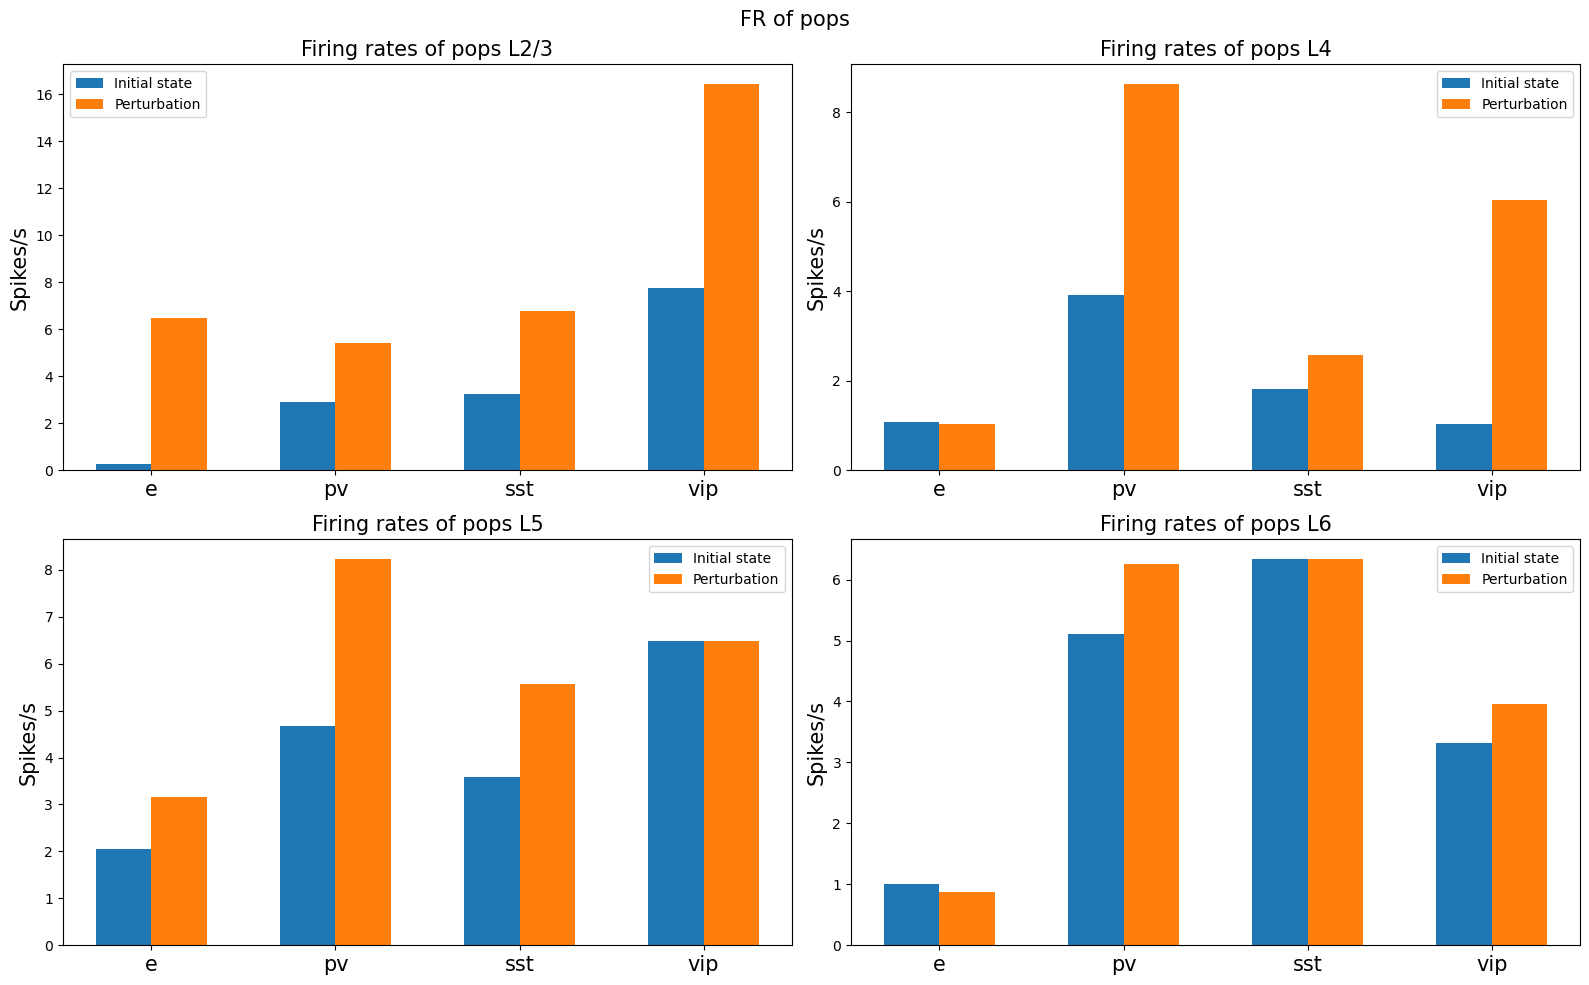

In [13]:
#Plot of firing rates of one particular situation where the perturbative input is given to one population
#in comparison with case without the input

#Data to plot
#Firing rates with the input
model_means23 = [rate_e23_1,rate_pv23_1,rate_sst23_1,rate_vip23_1]
model_means4= [rate_e4_1,rate_pv4_1,rate_sst4_1,rate_vip4_1]
model_means5= [rate_e5_1,rate_pv5_1,rate_sst5_1,rate_vip5_1]
model_means6 = [rate_e6_1,rate_pv6_1,rate_sst6_1,rate_vip6_1]

#Firinr rates without the input
base_means23 = [rate_e23_0,rate_pv23_0,rate_sst23_0,rate_vip23_0]
base_means4= [rate_e4_0,rate_pv4_0,rate_sst4_0,rate_vip4_0]
base_means5= [rate_e5_0,rate_pv5_0,rate_sst5_0,rate_vip5_0]
base_means6 = [rate_e6_0,rate_pv6_0,rate_sst6_0,rate_vip6_0]


#Lables for the plot 
labels = ['e','pv', 'sst', 'vip']
x = np.arange(len(labels))  # the label locations
w = 0.3  # the width of the bars
width=0.3

#Create the plot
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(16,10))

f.suptitle('FR of pops',fontsize=15)
rects1_23 = ax1.bar(x - width/2, base_means23, width=w, label='Initial state')
rects2_23 = ax1.bar(x + width/2, model_means23, width=w, label='Perturbation')

rects1_4 = ax2.bar(x - width/2, base_means4, width=w, label='Initial state')
rects2_4 = ax2.bar(x + width/2, model_means4, width=w, label='Perturbation')

rects1_5 = ax3.bar(x - width/2, base_means5, width=w, label='Initial state')
rects2_5 = ax3.bar(x + width/2, model_means5, width=w, label='Perturbation')

rects1_6 = ax4.bar(x - width/2, base_means6, width=w, label='Initial state')
rects2_6 = ax4.bar(x + width/2, model_means6, width=w, label='Perturbation')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_ylabel('Spikes/s', fontsize=15)
ax1.set_title('Firing rates of pops L2/3',fontsize=15)
ax1.set_xticks(x)
ax1.set_xticklabels(labels, fontsize=15)
ax1.legend()

ax2.set_ylabel('Spikes/s', fontsize=15)
ax2.set_title('Firing rates of pops L4',fontsize=15)
ax2.set_xticks(x)
ax2.set_xticklabels(labels, fontsize=15)
ax2.legend()

ax3.set_ylabel('Spikes/s', fontsize=15)
ax3.set_title('Firing rates of pops L5',fontsize=15)
ax3.set_xticks(x)
ax3.set_xticklabels(labels, fontsize=15)
ax3.legend()

ax4.set_ylabel('Spikes/s', fontsize=15)
ax4.set_title('Firing rates of pops L6',fontsize=15)
ax4.set_xticks(x)
ax4.set_xticklabels(labels, fontsize=15)
ax4.legend()

f.tight_layout()

plt.show()

In [14]:
#Here I generate the plots in Fig. 2A, 2B (right panels). 
#Mean firing rates in the state before the perturbative input and after it.
#Perturbative input to E2/3, effect observed on layer 5
#Spontaenous (Fig.2A) and FF case (Fig.2B) 

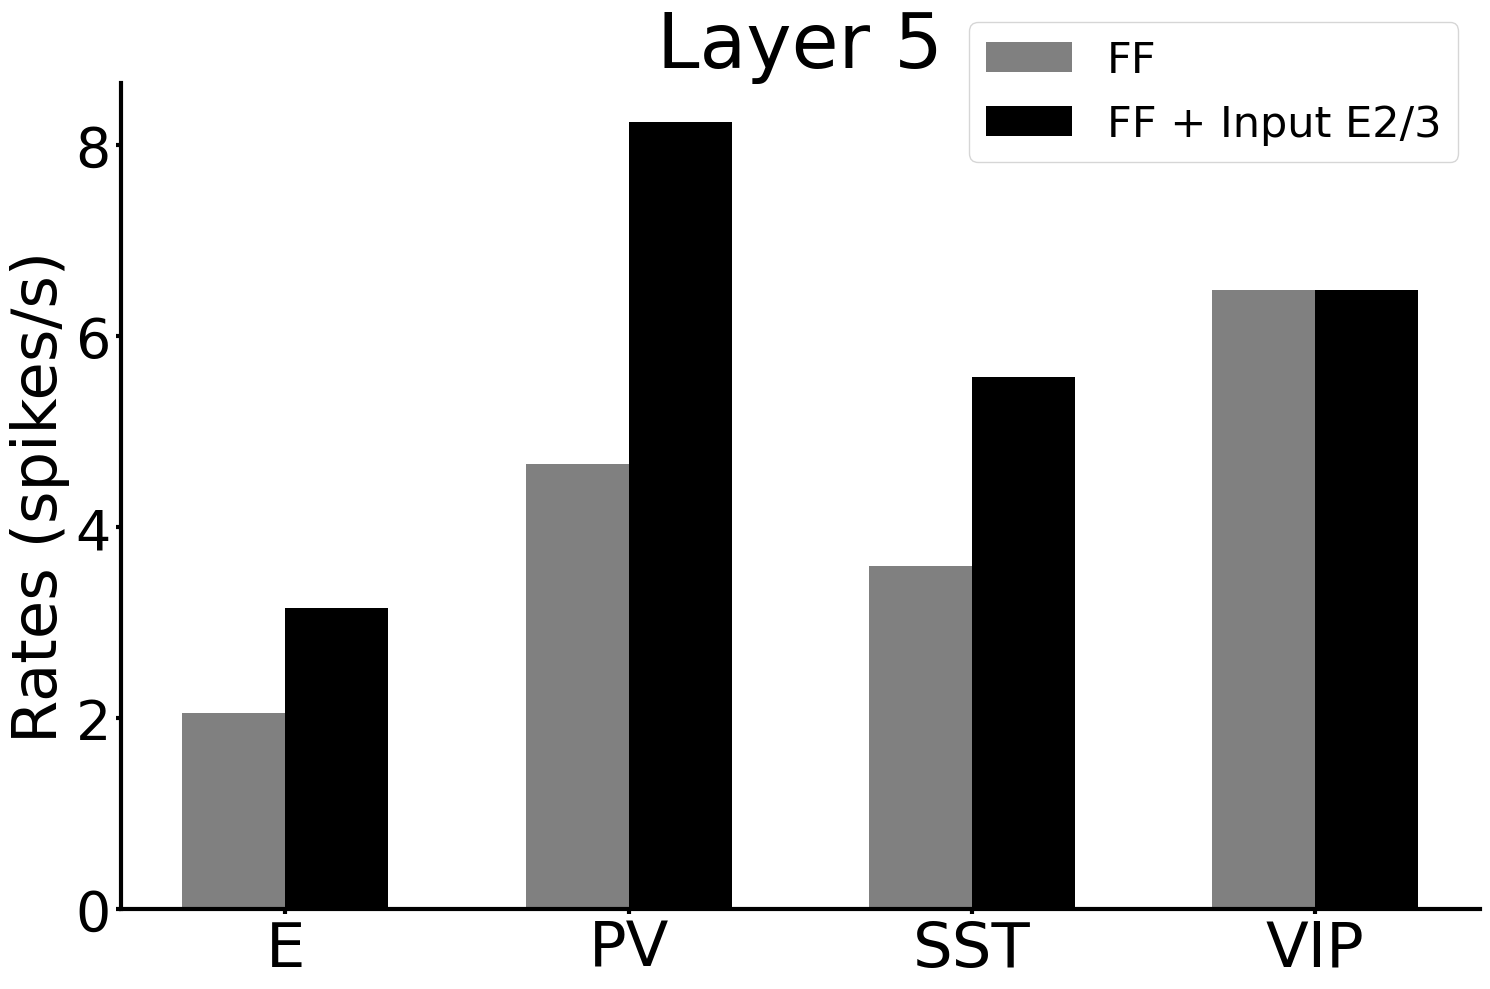

In [15]:
#Fig2: Mean firing rates in the spontanous and in the condition with perturbative input to one population (E2/3).
#Fig2: Mean firing rates in the FF state and in the condition with perturbative input to one population (E2/3).

#Layer 5 only is shown

#Data to plot
model_means5= [rate_e5_1,rate_pv5_1,rate_sst5_1,rate_vip5_1]
base_means5= [rate_e5_0,rate_pv5_0,rate_sst5_0,rate_vip5_0]


#Labels for the plot
labels = ['E','PV', 'SST', 'VIP']
x = np.arange(len(labels))  # the label locations
w = 0.3  # the width of the bars
width=0.3

#Plot 
f, ax = plt.subplots(figsize=(15,10))
#to plot the Spontanous case
#ax.bar(x - width/2, base_means5, width=w,color='grey', alpha=1, label='Spontaneous')
#ax.bar(x + width/2, model_means5, width=w,color='black', alpha=1, label='Spontaneous + Input E2/3')

#to plot the FF case
ax.bar(x - width/2, base_means5, width=w,color='grey', alpha=1, label='FF')
ax.bar(x + width/2, model_means5, width=w,color='black', alpha=1, label='FF + Input E2/3')


#Layout
ax.xaxis.set_tick_params(width=3)
ax.yaxis.set_tick_params(width=3)
ax.set_ylabel('Rates (spikes/s)', fontsize=45)
ax.set_title('Layer 5',fontsize=55)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=45)
plt.yticks(fontsize=40)
plt.locator_params(axis='y', nbins=5)

ax.tick_params(top=False,
       bottom=True,
       left=True,
       right=False,
       labelleft=True,
       labelbottom=True)

plt.setp(ax.spines.values(), linewidth=3) #linewidth of the plot
plt.gca().spines['right'].set_color('none') #No box of the plot
plt.gca().spines['top'].set_color('none')

#Legend
#For Spontanous case (Fig 2A): 
#ax.legend(fontsize=31)
#For FF case (Fig 2B): 
ax.legend(loc='upper right',bbox_to_anchor=(1, 1.1), fontsize=31) 

f.tight_layout()

#Save the fig
#plt.savefig('../IMAGES/fig2_bar_spont.png') #(Fig 2A)
#plt.savefig('../IMAGES/fig2_bar_FF.png')     #(Fig 2B)

plt.show()



In [20]:
#From here I create the plots for the perturbation matrix 

#For the spont. case (Fig 2A):
#folder_data='../simulations_data/In_spontaneuous'
#For the FF case (Fig 2B):
#folder_data='../simulations_data/In_with_e4'




folder_data='../simulations_data/In_with_e4'


In [21]:
#I create the matrix that will contain the firing rate of each population in that particular simulation
#The input is given to one different population for every simulation.

Matrix_all=[] #create empty array

for i in ['i1','i2','i3','i4','i5','i6','i7','i8','i9','i10','i11','i12','i13','i14','i15','i16']:
    #i1 contains the data of the simualtion with perturbative input to first population (E2/3),
    #i2 (input to PV2/3), etc. 
    #I have 16 simulations: input to one population in each simualtion (16 populations in total)
    
    #Import the data of one simulation 'i'
    S_vip1num_spikes_1,S_e4num_spikes_1,S_pv4num_spikes_1,S_sst4num_spikes_1,S_vip4num_spikes_1,S_e5num_spikes_1,S_pv5num_spikes_1,S_sst5num_spikes_1,S_vip5num_spikes_1,S_e6num_spikes_1,S_pv6num_spikes_1,S_sst6num_spikes_1,S_vip6num_spikes_1,S_e23num_spikes_1,S_pv23num_spikes_1,S_sst23num_spikes_1,S_vip23num_spikes_1=take_files(folder_data+'/'+i+'/Sp_1')
    
    #compute the rates 
    rate_e23_1,rate_pv23_1,rate_sst23_1,rate_vip23_1,rate_e4_1,rate_pv4_1,rate_sst4_1,rate_vip4_1,rate_e5_1,rate_pv5_1,rate_sst5_1,rate_vip5_1,rate_e6_1,rate_pv6_1,rate_sst6_1,rate_vip6_1=compute_FR(N,N1,runtime,
    S_vip1num_spikes_1,S_e4num_spikes_1,S_pv4num_spikes_1,S_sst4num_spikes_1,
    S_vip4num_spikes_1,S_e5num_spikes_1,S_pv5num_spikes_1,S_sst5num_spikes_1,
    S_vip5num_spikes_1,S_e6num_spikes_1,S_pv6num_spikes_1,S_sst6num_spikes_1,
    S_vip6num_spikes_1,S_e23num_spikes_1,S_pv23num_spikes_1,S_sst23num_spikes_1,S_vip23num_spikes_1)


    #PERCENTAGE CHANGE of the FR of EACH population (I compare to the value before the input)
    dif_e23=(rate_e23_1 - rate_e23_0)/ rate_e23_0
    dif_pv23=(rate_pv23_1 - rate_pv23_0) / rate_pv23_0
    dif_sst23=(rate_sst23_1 - rate_sst23_0) / rate_sst23_0
    dif_vip23= (rate_vip23_1 - rate_vip23_0)/rate_vip23_0
    dif_e4=(rate_e4_1 - rate_e4_0 )/rate_e4_0
    dif_pv4=(rate_pv4_1 - rate_pv4_0) /rate_pv4_0
    dif_sst4=(rate_sst4_1 - rate_sst4_0) /rate_sst4_0
    dif_vip4=(rate_vip4_1 - rate_vip4_0) /rate_vip4_0
    dif_e5=(rate_e5_1 - rate_e5_0) /rate_e5_0
    dif_pv5=(rate_pv5_1 - rate_pv5_0) /rate_pv5_0
    dif_sst5=(rate_sst5_1 - rate_sst5_0) /rate_sst5_0
    dif_vip5=(rate_vip5_1 - rate_vip5_0) /rate_vip5_0
    dif_e6=(rate_e6_1 - rate_e6_0) /rate_e6_0
    dif_pv6=(rate_pv6_1 - rate_pv6_0) /rate_pv6_0
    dif_sst6=(rate_sst6_1 - rate_sst6_0) /rate_sst6_0
    dif_vip6=(rate_vip6_1 - rate_vip6_0) /rate_vip6_0
    
    #I create the first row of the matrix containing all the rates
    dif_row=[dif_e23,dif_pv23,dif_sst23,dif_vip23,
            dif_e4,dif_pv4,dif_sst4,dif_vip4,
             dif_e5,dif_pv5,dif_sst5,dif_vip5,
             dif_e6,dif_pv6,dif_sst6,dif_vip6]
    
    Matrix_all.append(dif_row) #Fill the matrix with the data you computed
    

#Save the matrix in one file
#f=open('../simulations_data/matrix/MATRIX_baseline.txt','w+') #create the file to write the values of the matrix
f=open('../simulations_data/matrix/MATRIX_inpute4.txt','w+') #create the file to write the values of the matrix

for i in range(0,16):
    for j in range(0,16):
        f.write('%f ' %Matrix_all[i][j]) # write the value in the i,j position of the matrix 
    f.write('\n')
f.close()

runtime: 3.0
-----------------------Computing the firing rates--------------------------------
rate_vip1: 0.777778
rate_e23: 7.364617 rate_pv23: 11.179487 rate_sst23: 12.333333 rate_vip23: 27.626168
rate_e4: 13.594059 rate_pv4: 15.479592 rate_sst4: 2.861635 rate_vip4: 7.641975
rate_e5: 3.821862 rate_pv5: 18.608466 rate_sst5: 11.178571 rate_vip5: 15.575758
rate_e6: 3.609660 rate_pv6: 11.486928 rate_sst6: 6.114379 rate_vip6: 3.754386
runtime: 3.0
-----------------------Computing the firing rates--------------------------------
rate_vip1: 0.638889
rate_e23: 0.355717 rate_pv23: 18.241026 rate_sst23: 6.957447 rate_vip23: 14.813084
rate_e4: 13.120462 rate_pv4: 7.812925 rate_sst4: 1.962264 rate_vip4: 1.777778
rate_e5: 2.584795 rate_pv5: 12.788360 rate_sst5: 7.940476 rate_vip5: 16.424242
rate_e6: 4.234890 rate_pv6: 11.408497 rate_sst6: 6.323529 rate_vip6: 3.947368
runtime: 3.0
-----------------------Computing the firing rates--------------------------------
rate_vip1: 0.451389
rate_e23: 0.4644

In [486]:
#I import the matrix I just created
#m_import=np.loadtxt('../simulations_data/matrix/MATRIX_baseline.txt') #For spontaneous
m_import=np.loadtxt('../simulations_data/matrix/MATRIX_inpute4.txt')   #For FF

In [487]:
#THis is to find the values for the color map
matrix=m_import
# Step 1: Identify positive values
positive_values = matrix[matrix > 0]

# Step 2: Sort the positive values
sorted_positive_values = np.sort(positive_values)
print(sorted_positive_values)
# Step 3: Select values at regular intervals
interval = int(len(sorted_positive_values)/5) # Example interval, you can choose the desired interval
selected_values = sorted_positive_values[interval::interval]
print(selected_values)

selected_values_new=(selected_values/(2*np.max(matrix)))+0.5
print(selected_values_new)



negative_values = matrix[matrix < 0]

# Step 2: Sort the positive values
sorted_negative_values = np.sort(negative_values)
print(sorted_negative_values)
# Step 3: Select values at regular intervals
interval_neg = int(len(sorted_negative_values)/4) # Example interval, you can choose the desired interval
selected_values_neg = sorted_negative_values[::interval_neg]
print(selected_values_neg)

selected_values_neg_new=0.5+(selected_values_neg/(2*np.max(matrix)))
print(selected_values_neg_new)

[4.425000e-03 5.755000e-03 5.793000e-03 1.354100e-02 1.421800e-02
 1.769900e-02 1.834900e-02 1.895700e-02 1.925800e-02 2.095100e-02
 2.371800e-02 2.417400e-02 2.446500e-02 2.549900e-02 2.711900e-02
 2.752300e-02 3.549300e-02 3.796600e-02 4.002100e-02 4.054800e-02
 4.197700e-02 4.270700e-02 4.422100e-02 5.651300e-02 9.359600e-02
 1.039760e-01 1.171540e-01 1.185810e-01 1.314980e-01 1.341270e-01
 1.354210e-01 1.377920e-01 1.590210e-01 1.608610e-01 1.625620e-01
 1.805980e-01 1.874760e-01 2.019700e-01 2.052630e-01 2.070180e-01
 2.271190e-01 2.313110e-01 2.477880e-01 2.601540e-01 2.906790e-01
 3.314960e-01 3.347550e-01 3.914370e-01 4.012890e-01 4.085410e-01
 4.380500e-01 4.658860e-01 4.779660e-01 4.809200e-01 5.063330e-01
 5.167020e-01 5.176990e-01 5.682290e-01 5.813120e-01 5.884960e-01
 6.105260e-01 6.137110e-01 6.139640e-01 7.453190e-01 8.114940e-01
 8.128810e-01 8.653620e-01 8.952670e-01 1.024561e+00 1.131057e+00
 1.142832e+00 1.177464e+00 1.238197e+00 1.411525e+00 1.639316e+00
 1.834005e

In [488]:
# for i in range(0,16):
#     m_import[i][i]=0

#m_import[0][7]=0
#m_import[8][7]=0

#np.fill_diagonal(m_import, np.nan)

#m_import_1 = np.sign(m_import) * np.log(np.abs(m_import)) 
# for i in range(0,16):
#     for j in range(0,16):
#         print(m_import[i][j])
#         #m_import[i][j]= np.sign(m_import[i][j]) * np.log10(np.abs(m_import[i][j])) 
#         m_import[i][j]=np.sign(m_import[i][j])*np.sqrt(np.abs(m_import[i][j]))
#         print(m_import[i][j])



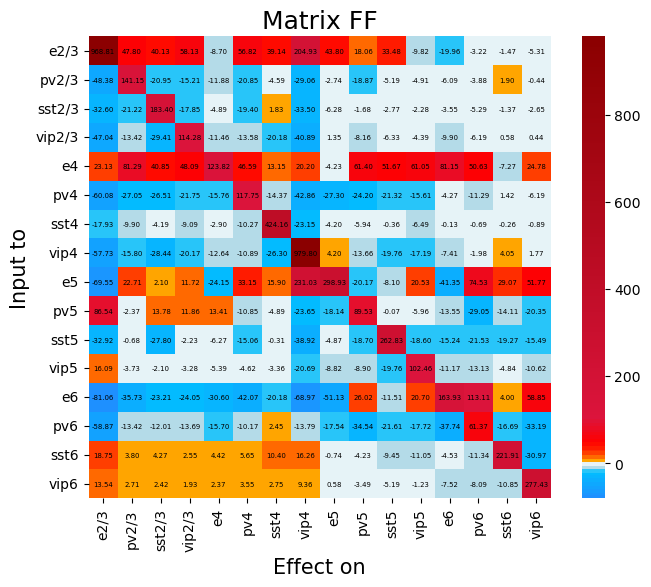

In [489]:
#Plot of the matrix
#Percentage change of the firing rate of each population as effect of the perturbation input to one population ("source population").
from matplotlib.colors import LinearSegmentedColormap

#create the figure
fig = plt.figure(figsize=(8, 6)) 
#labels
x_axis_labels = ['e2/3','pv2/3','sst2/3','vip2/3','e4','pv4','sst4','vip4','e5','pv5','sst5','vip5','e6','pv6','sst6','vip6'] # labels for x-axis
y_axis_labels = ['e2/3','pv2/3','sst2/3','vip2/3','e4','pv4','sst4','vip4','e5','pv5','sst5','vip5','e6','pv6','sst6','vip6'] # labels for x-axis

# colors = [(0, 'blue'),
#           (selected_values_neg_new[0], 'blue'),
#           (selected_values_neg_new[1], 'deepskyblue'),
#           (selected_values_neg_new[2], 'lightblue'),
#           (0.5, 'white'), 
#           (selected_values_new[0], 'yellow'),
#           (selected_values_new[1], 'orange'),
#           (selected_values_new[2], 'red'),
#           (selected_values_new[3], 'darkred'), 
#           (1, 'black')]

colors = [(0, 'darkblue'),
          (selected_values_neg_new[0], 'dodgerblue'),
          (selected_values_neg_new[1], 'deepskyblue'),
          (selected_values_neg_new[2], 'lightblue'),
          (0.5, 'white'), 
          (selected_values_new[0], 'orange'),
          (selected_values_new[1], 'orangered'),
          (selected_values_new[2], 'red'),
          (selected_values_new[3], 'crimson'), 
          (1, 'darkred')]

# Create a colormap that maps the given colors to values between 0 and 1
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)

norm = plt.Normalize(vmin=np.min(m_import)*100, vmax=np.max(m_import)*100)


mA_plot = sns.heatmap(np.array(m_import)*100,annot=True,norm=norm,center=0,square=True,cmap=custom_cmap,xticklabels=x_axis_labels, yticklabels=y_axis_labels,mask=np.isnan(m_import),fmt=".2f", annot_kws={"size": 5, "color": "black"}) # plot with heatmap
mA_plot.set_xlabel('Effect on', fontsize=15)
mA_plot.set_ylabel('Input to', fontsize=15)
#plt.title('Matrix baseline',fontsize=18)
plt.title('Matrix FF',fontsize=18)

#Show the plot
plt.show(mA_plot)

In [490]:
# Store the original diagonal values
original_diagonal_values = np.diag(m_import).copy()

print(original_diagonal_values)
# Set the diagonal elements to NaN to exclude them from the colormap
np.fill_diagonal(m_import, np.nan)


[9.688063 1.411525 1.834005 1.142832 1.238197 1.177464 4.24159  9.79803
 2.989336 0.895267 2.628287 1.024561 1.639316 0.613711 2.219063 2.774336]


In [491]:
print(original_diagonal_values)

[9.688063 1.411525 1.834005 1.142832 1.238197 1.177464 4.24159  9.79803
 2.989336 0.895267 2.628287 1.024561 1.639316 0.613711 2.219063 2.774336]


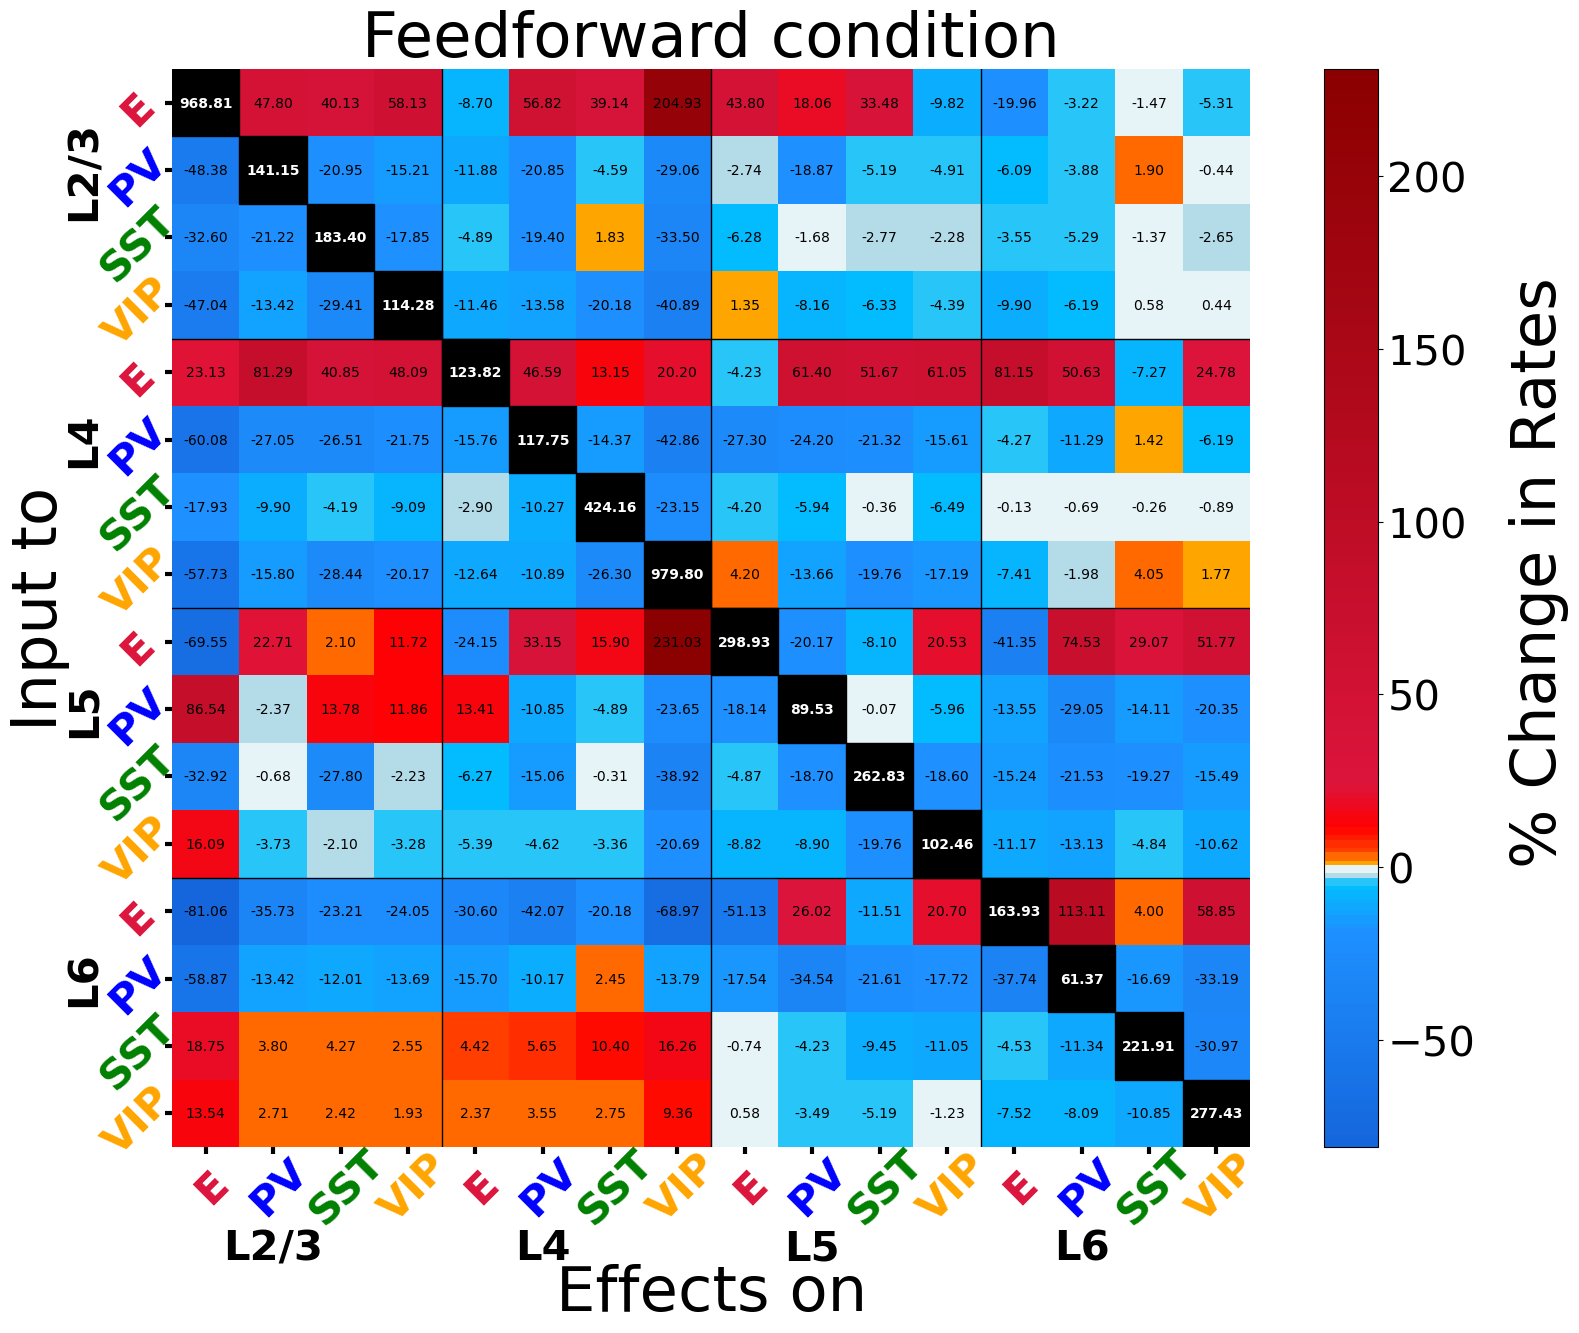

In [493]:
#I create the figure 
fig = plt.figure(figsize=(19, 14)) #create the figure


#norm = plt.Normalize(vmin=np.min(m_import)*100, vmax=np.max(m_import)*100)
norm = plt.Normalize(vmin=np.nanmin(m_import)*100, vmax=np.nanmax(m_import)*100)

#cmap='PRGn'
#Plot
mA_plot = sns.heatmap(np.array(m_import)*100,annot=True,cmap=custom_cmap,norm=norm,center=0,square=True,cbar=False, linewidths=0.,fmt=".2f", annot_kws={"size": 10, "color": "black"}) # plot GH with heatmap


# Add black diagonal with original values as white text
for i in range(len(original_diagonal_values)):
    mA_plot.add_patch(plt.Rectangle((i, i), 1, 1, fill=True, color='black'))
    mA_plot.text(i+0.5, i+0.5, f'{original_diagonal_values[i]*100:.2f}', ha='center', va='center', color='white', fontsize=10, fontweight='bold')


mA_plot.tick_params(axis='both', which='major', width=3, length=5)
mA_plot.set_xticklabels([])
mA_plot.set_yticklabels([])

# Define your labels and their positions
layer_labels = ['L2/3', 'L4', 'L5', 'L6']
x_positions = [1.5, 5.5, 9.5, 13.5]  # X positions for the labels, centered in each block of 4
y_positions = [1.5, 5.5, 9.5, 13.5]  # Y positions for the labels, centered in each block of 4

# Add text labels for the X axis
for label, pos in zip(layer_labels, x_positions):
    plt.text(pos, 17.5, label, ha='center', va='center', fontsize=30, fontweight='bold')

# Add text labels for the Y axis
for label, pos in zip(layer_labels, y_positions):
    plt.text(-1.3, pos, label, ha='center', va='center', fontsize=30, fontweight='bold', rotation=90)

#Labels of the axis
cell_type_labels = ['E','PV','SST','VIP','E','PV','SST','VIP','E','PV','SST','VIP','E','PV','SST','VIP']
colors = ['crimson', 'blue', 'green', 'orange','crimson', 'blue', 'green', 'orange','crimson', 'blue', 'green', 'orange','crimson', 'blue', 'green', 'orange']
x_positions = np.arange(len(cell_type_labels))  # X positions for the labels

# Add colored text labels for the X axis
for label, color, pos in zip(cell_type_labels, colors, x_positions):
    #plt.text(pos+0.6, 16.6, label, ha='center', va='center', fontsize=27, rotation=45, fontweight='bold', color=color)
    #plt.text(-0.5, pos+0.6, label, ha='center', va='center', fontsize=27, rotation=45, fontweight='bold', color=color)

    plt.text(pos+0.6, 16.6, label, ha='center', va='center', fontsize=30, rotation=45, fontweight='bold', color=color)
    plt.text(-0.5, pos+0.6, label, ha='center', va='center', fontsize=30, rotation=45, fontweight='bold', color=color)

#Lines to guide the eye
for i in range(4, m_import.shape[0], 4):  # Start at 4 and count by 4s
    plt.axhline(i, color='black', linewidth=1)  # Horizontal line
    plt.axvline(i, color='black', linewidth=1)  # Vertical line

cbar = mA_plot.figure.colorbar(mA_plot.collections[0])
cbar_pos = cbar.ax.get_position()

# Set the position of the label. Adjust the x and y values as needed.
cbar.ax.text(4, 0,'% Change in Rates', rotation=90, va='bottom', ha='center', fontsize=45)

cax = mA_plot.figure.axes[-1]
cax.tick_params(labelsize=30)

#Labels of the axes
mA_plot.set_xlabel('Effects on', fontsize=45, labelpad=75)
mA_plot.set_ylabel('Input to', fontsize=45, labelpad=65)
#plt.title('Spontaneous condition',fontsize=45) #Fig 2A
plt.title('Feedforward condition',fontsize=45)  #Fig 2B


#Save the image
#Fig 2A:
#plt.savefig('../IMAGES/fig2_matrix_spont_colorsBlackblue.png', bbox_inches='tight')
#Fig 2B:
plt.savefig('../IMAGES/fig2_matrix_FF_colorsBlackblue.png', bbox_inches='tight')

plt.show(mA_plot)

In [117]:
#To better visualize the changes in firing rates we are creating a new matrix 

#I WANT A MATRIX with only 3 values:
# 1 if the fr is increased (by more than 20%)
# -1 if the fr is decreased (by more than 20%)
# 0 if is the same (less/more by less than 20%)

sign_matrix= [[0 for x in range(0,16)] for y in range(0,16)] #create the matrix filled with 0 

threshold=0.2

for h in range(0,16):
    for k in range(0,16):
        if m_import[h][k]>0 and m_import[h][k]>threshold :
            sign_matrix[h][k]=1
        elif abs(m_import[h][k])<threshold :
            sign_matrix[h][k]=0
        elif m_import[h][k]<0 and abs(m_import[h][k])>threshold :
            sign_matrix[h][k]=-1
#print(sign_matrix)

In [150]:
#Save the matrix in one file
#f=open('../simulations_data/matrix/sign_baseline_20.txt','w+') #Spontaneous
f=open('../simulations_data/matrix/sign_inpute4_20.txt','w+') #FF
for i in range(0,16):
    for j in range(0,16):
        f.write('%f ' %sign_matrix[i][j]) # write the value in the i,j position of the matrix 
    f.write('\n')
f.close()

In [151]:
#I import the matrix I just created
#sign_matrix=np.loadtxt('../simulations_data/matrix/sign_baseline_20.txt') #Spontaneous
sign_matrix=np.loadtxt('../simulations_data/matrix/sign_inpute4_20.txt')   #FF


In [ ]:
#Fig. 2A and 2B, perturbation matrix 

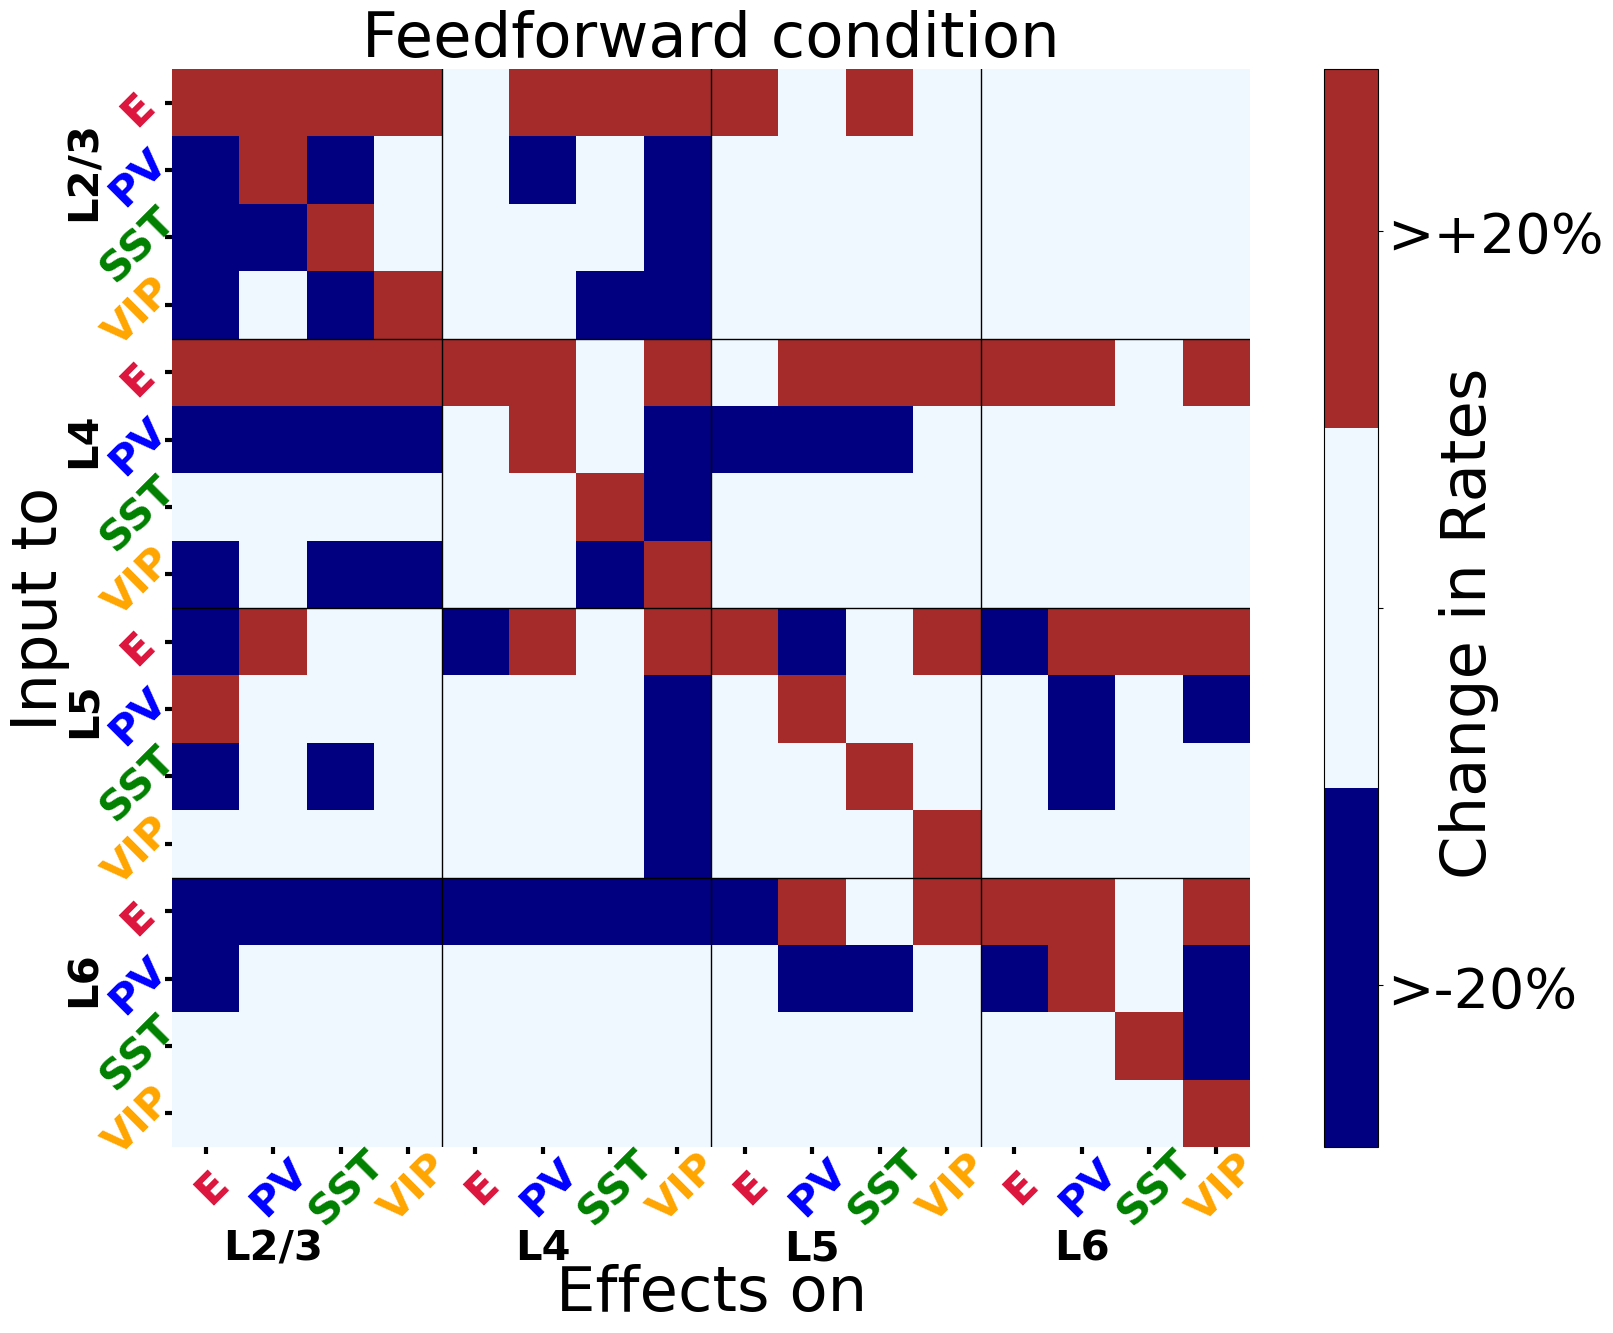

In [152]:
#I create the figure 
fig = plt.figure(figsize=(19, 14)) #create the figure



colors = ["navy", "aliceblue",'brown' ]#colors I want 
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
col_map=sns.color_palette(colors)

#Plot
mA_plot = sns.heatmap(np.array(sign_matrix),square=True,cmap=col_map,cbar=False, linewidths=0.) # plot GH with heatmap

mA_plot.tick_params(axis='both', which='major', width=3, length=5)
mA_plot.set_xticklabels([])
mA_plot.set_yticklabels([])

# Define your labels and their positions
layer_labels = ['L2/3', 'L4', 'L5', 'L6']
x_positions = [1.5, 5.5, 9.5, 13.5]  # X positions for the labels, centered in each block of 4
y_positions = [1.5, 5.5, 9.5, 13.5]  # Y positions for the labels, centered in each block of 4

# Add text labels for the X axis
for label, pos in zip(layer_labels, x_positions):
    plt.text(pos, 17.5, label, ha='center', va='center', fontsize=30, fontweight='bold')

# Add text labels for the Y axis
for label, pos in zip(layer_labels, y_positions):
    plt.text(-1.3, pos, label, ha='center', va='center', fontsize=30, fontweight='bold', rotation=90)

#Labels of the axis
cell_type_labels = ['E','PV','SST','VIP','E','PV','SST','VIP','E','PV','SST','VIP','E','PV','SST','VIP']
colors = ['crimson', 'blue', 'green', 'orange','crimson', 'blue', 'green', 'orange','crimson', 'blue', 'green', 'orange','crimson', 'blue', 'green', 'orange']
x_positions = np.arange(len(cell_type_labels))  # X positions for the labels

# Add colored text labels for the X axis
for label, color, pos in zip(cell_type_labels, colors, x_positions):
    #plt.text(pos+0.6, 16.6, label, ha='center', va='center', fontsize=27, rotation=45, fontweight='bold', color=color)
    #plt.text(-0.5, pos+0.6, label, ha='center', va='center', fontsize=27, rotation=45, fontweight='bold', color=color)

    plt.text(pos+0.6, 16.6, label, ha='center', va='center', fontsize=30, rotation=45, fontweight='bold', color=color)
    plt.text(-0.5, pos+0.6, label, ha='center', va='center', fontsize=30, rotation=45, fontweight='bold', color=color)

#Lines to guide the eye
for i in range(4, sign_matrix.shape[0], 4):  # Start at 4 and count by 4s
    plt.axhline(i, color='black', linewidth=1)  # Horizontal line
    plt.axvline(i, color='black', linewidth=1)  # Vertical line

cbar = mA_plot.figure.colorbar(mA_plot.collections[0])

#Set bar layout
colorbar = mA_plot.collections[0].colorbar
colorbar.set_ticks([-0.7, 0, 0.7])
colorbar.set_ticklabels(['>-20%', '', '>+20%'])
# colorbar.set_ticklabels(['>-10%', '0', '>10%'])
# colorbar.set_ticklabels(['>-30%', '0', '>30%'])
# colorbar.set_ticklabels(['>-50%', '0', '>50%'])

cbar_pos = cbar.ax.get_position()

# Set the position of the label. Adjust the x and y values as needed.
cbar.ax.text(2.7, -0.5, 'Change in Rates', rotation=90, va='bottom', ha='center', fontsize=45)

cax = mA_plot.figure.axes[-1]
cax.tick_params(labelsize=40)

#Labels of the axes
mA_plot.set_xlabel('Effects on', fontsize=45, labelpad=75)
mA_plot.set_ylabel('Input to', fontsize=45, labelpad=65)
#plt.title('Spontaneous condition',fontsize=45) #Fig 2A
plt.title('Feedforward condition',fontsize=45)  #Fig 2B


#Save the image
#Fig 2A:
#plt.savefig('../IMAGES/fig2_matrix_spont.png', bbox_inches='tight')
#Fig 2B:
plt.savefig('../IMAGES/fig2_matrix_FF.png', bbox_inches='tight')

plt.show(mA_plot)

In [120]:
#Fig. 2C
#Comparison between two matrices

In [155]:
#Comparison Feedforward and spontaneous 
sign_baseline=np.loadtxt('../simulations_data/matrix/sign_baseline_20.txt') #Spontaneous
sign_input=np.loadtxt('../simulations_data/matrix/sign_inpute4_20.txt')     #FF

In [156]:
sign_matrix_diff= [[0 for x in range(0,16)] for y in range(0,16)] #create the matrix filled with 0 
#0 means no change (between the two matrices)
#1 means change increase: from -1 to 0, 0 to 1, -1 to 1
#- 1 means change decrease: from 1 to 0, from 0 to -1
for h in range(0,16):
    for k in range(0,16):
        if sign_baseline[h][k]== sign_input[h][k]:
            sign_matrix_diff[h][k]=0  
    
        if sign_baseline[h][k]== 1 and sign_input[h][k]==0 :
            sign_matrix_diff[h][k]=-1
        if sign_baseline[h][k]==0 and sign_input[h][k]==-1:
            sign_matrix_diff[h][k]=-1    

        if sign_baseline[h][k]== -1 and sign_input[h][k]==0 :
            sign_matrix_diff[h][k]=1
        if sign_baseline[h][k]==0 and sign_input[h][k]==1:
            sign_matrix_diff[h][k]=1
            

        if sign_baseline[h][k]==1 and sign_input[h][k]==-1:
            sign_matrix_diff[h][k]=-1
        if sign_baseline[h][k]==-1 and sign_input[h][k]==1:
            sign_matrix_diff[h][k]=1

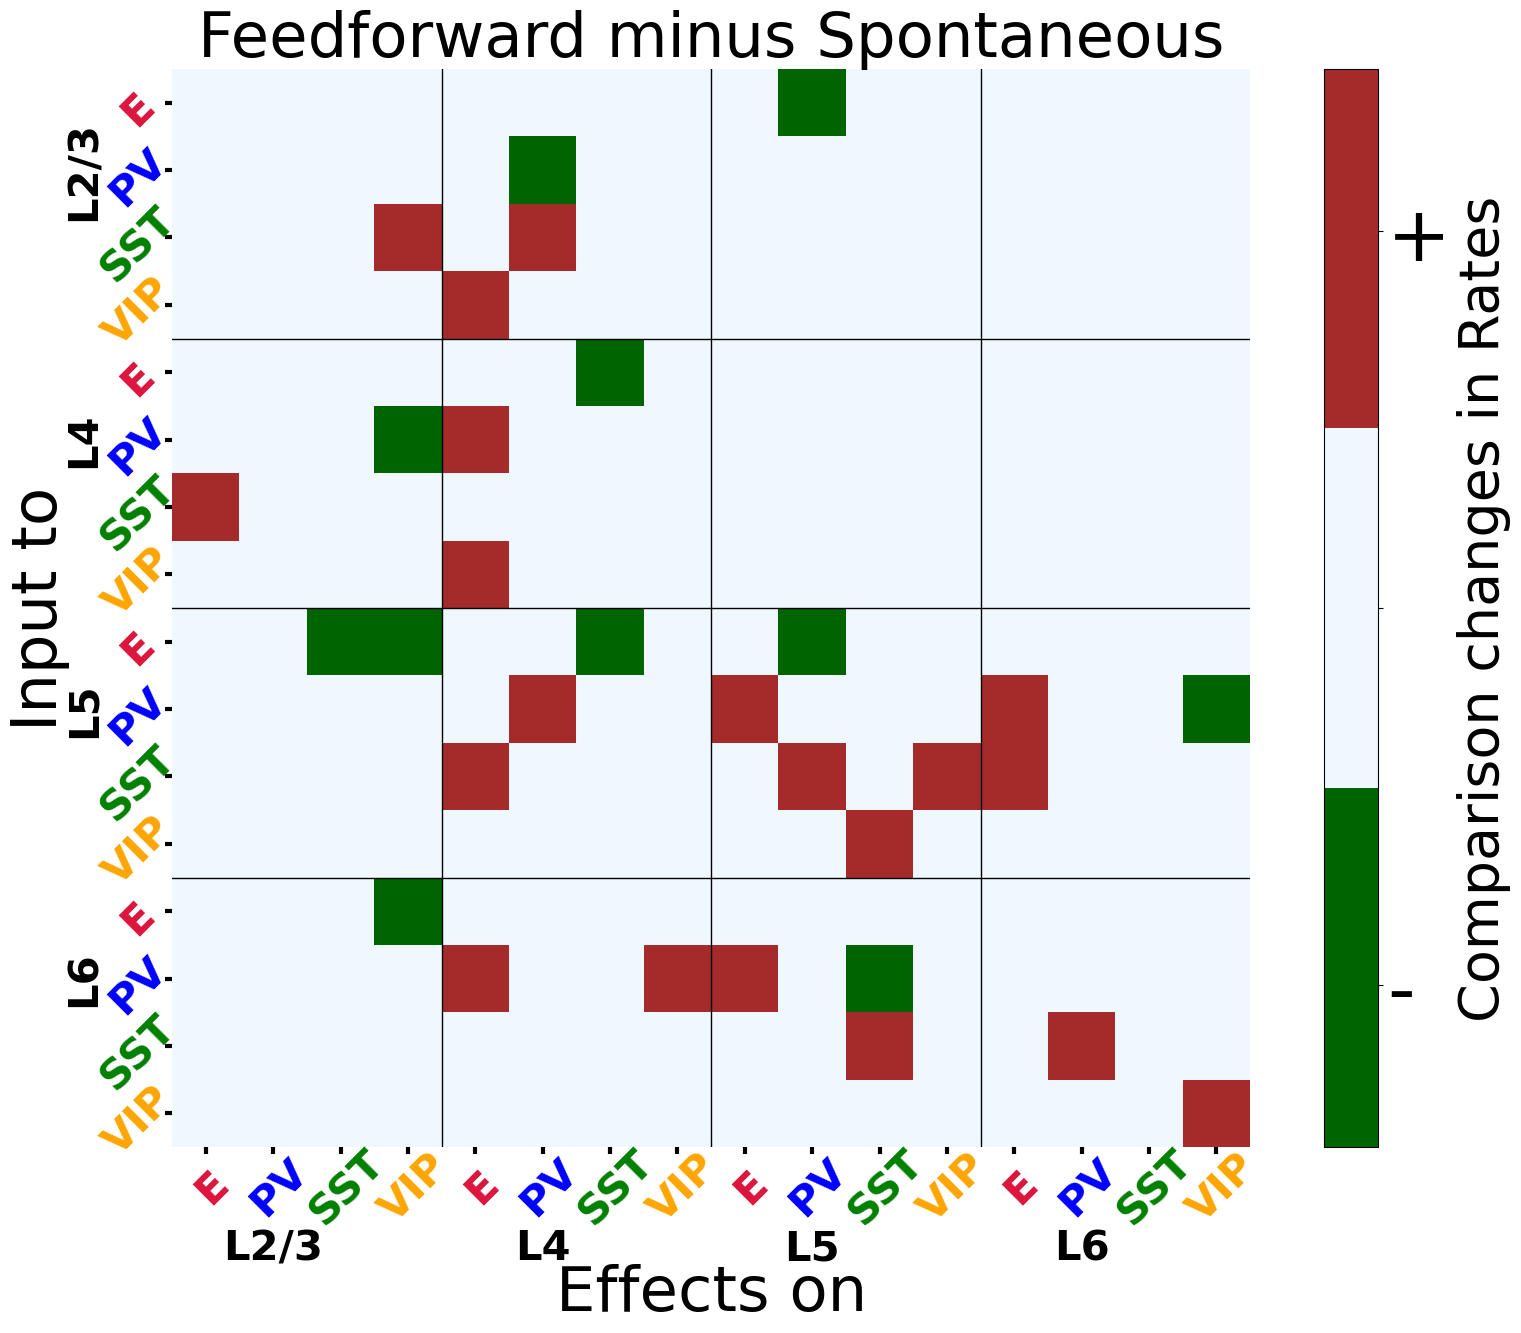

In [157]:
#Create the matrix plot 
fig = plt.figure(figsize=(19, 14)) #create the figure

colors = ["darkgreen", "aliceblue",'brown' ] #colors

# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
col_map=sns.color_palette(colors)

#Plot
mA_plot = sns.heatmap(np.array(sign_matrix_diff),square=True,cmap=col_map,cbar=False,xticklabels=x_axis_labels, yticklabels=y_axis_labels, linewidths=0.) # plot GH with heatmap

#Layout matrix
mA_plot.tick_params(axis='both', which='major', width=3, length=5)
mA_plot.set_xticklabels([])
mA_plot.set_yticklabels([])

# Define your labels and their positions
layer_labels = ['L2/3', 'L4', 'L5', 'L6']
x_positions = [1.5, 5.5, 9.5, 13.5]  # X positions for the labels, centered in each block of 4
y_positions = [1.5, 5.5, 9.5, 13.5]  # Y positions for the labels, centered in each block of 4

# Add text labels for the X axis
for label, pos in zip(layer_labels, x_positions):
    plt.text(pos, 17.5, label, ha='center', va='center', fontsize=30, fontweight='bold')

# Add text labels for the Y axis
for label, pos in zip(layer_labels, y_positions):
    plt.text(-1.3, pos, label, ha='center', va='center', fontsize=30, fontweight='bold', rotation=90)

    
cell_type_labels = ['E','PV','SST','VIP','E','PV','SST','VIP','E','PV','SST','VIP','E','PV','SST','VIP']
colors = ['crimson', 'blue', 'green', 'orange','crimson', 'blue', 'green', 'orange','crimson', 'blue', 'green', 'orange','crimson', 'blue', 'green', 'orange']
x_positions = np.arange(len(cell_type_labels))  # X positions for the labels

# Add colored text labels for the X axis
for label, color, pos in zip(cell_type_labels, colors, x_positions):
    plt.text(pos+0.6, 16.6, label, ha='center', va='center', fontsize=30, rotation=45, fontweight='bold', color=color)
    plt.text(-0.5, pos+0.6, label, ha='center', va='center', fontsize=30, rotation=45, fontweight='bold', color=color)
    

#Lines to guide the eye
for i in range(4, sign_matrix.shape[0], 4):  # Start at 4 and count by 4s
    plt.axhline(i, color='black', linewidth=1)  # Horizontal line
    plt.axvline(i, color='black', linewidth=1)  # Vertical line

cbar = mA_plot.figure.colorbar(mA_plot.collections[0])

#Set bar layout
colorbar = mA_plot.collections[0].colorbar
colorbar.set_ticks([-0.7, 0, 0.7])
colorbar.set_ticklabels(['-', '', '+'])
colorbar.set_label("Comparison changes in Rates",size=40)
cax = mA_plot.figure.axes[-1]
cax.tick_params(labelsize=55)

#Labels of the axes
mA_plot.set_xlabel('Effects on', fontsize=45, labelpad=75)
mA_plot.set_ylabel('Input to', fontsize=45, labelpad=65)
plt.title('Feedforward minus Spontaneous',fontsize=45)

#Save fig
plt.savefig('../IMAGES/fig2_matrix_diff_spo_FF.png', bbox_inches='tight')

plt.show(mA_plot)

In [494]:
m_import_base=np.loadtxt('../simulations_data/matrix/MATRIX_baseline.txt') #For spontaneous
m_import_ff=np.loadtxt('../simulations_data/matrix/MATRIX_inpute4.txt')   #For FF

m_diff = m_import_ff - m_import_base

In [495]:
#THis is to find the values for the color map
matrix=m_diff
# Step 1: Identify positive values
positive_values = matrix[matrix > 0]

# Step 2: Sort the positive values
sorted_positive_values = np.sort(positive_values)
print(sorted_positive_values)
# Step 3: Select values at regular intervals
interval = int(len(sorted_positive_values)/5) # Example interval, you can choose the desired interval
selected_values = sorted_positive_values[interval::interval]
print(selected_values)

selected_values_new=(selected_values/(2*np.max(matrix)))+0.5
print(selected_values_new)



negative_values = matrix[matrix < 0]

# Step 2: Sort the positive values
sorted_negative_values = np.sort(negative_values)
print(sorted_negative_values)
# Step 3: Select values at regular intervals
interval_neg = int(len(sorted_negative_values)/5) # Example interval, you can choose the desired interval
selected_values_neg = sorted_negative_values[::interval_neg]
print(selected_values_neg)

selected_values_neg_new=0.5+(selected_values_neg/(2*np.abs(np.min(matrix))))
print(selected_values_neg_new)

[3.610000e-04 4.990000e-04 1.018000e-03 1.316000e-03 3.289000e-03
 4.391000e-03 5.723000e-03 5.755000e-03 6.360000e-03 8.533000e-03
 9.081000e-03 9.422000e-03 9.535000e-03 9.713000e-03 9.902000e-03
 1.078000e-02 1.084600e-02 1.233300e-02 1.698200e-02 1.781600e-02
 1.789200e-02 1.895700e-02 1.925800e-02 2.007100e-02 2.051700e-02
 2.053800e-02 2.081900e-02 2.174800e-02 2.371800e-02 2.380300e-02
 2.417400e-02 2.436500e-02 2.587000e-02 2.605000e-02 2.641600e-02
 2.673400e-02 2.711900e-02 2.712500e-02 2.727800e-02 2.732100e-02
 2.752300e-02 2.916500e-02 2.930100e-02 3.162800e-02 3.219000e-02
 3.403500e-02 3.476200e-02 3.502100e-02 3.537200e-02 3.549300e-02
 3.641900e-02 3.663400e-02 3.728400e-02 3.870600e-02 4.124900e-02
 4.278300e-02 4.372000e-02 4.963700e-02 5.062600e-02 5.134400e-02
 5.167700e-02 5.342100e-02 5.559300e-02 5.606900e-02 5.974600e-02
 6.125500e-02 6.220300e-02 6.309000e-02 6.460100e-02 6.506500e-02
 6.575400e-02 6.696800e-02 6.854600e-02 6.908600e-02 6.915100e-02
 7.121500e

In [496]:
# Store the original diagonal values
original_diagonal_values = np.diag(m_diff).copy()

print(original_diagonal_values)
# Set the diagonal elements to NaN to exclude them from the colormap
np.fill_diagonal(m_diff, np.nan)



[-14.714998  -0.988141  -2.572878  -1.016435 -11.528663  -1.311321
  -0.614441 -13.315894  -0.424595  -1.359472  -2.459713  -1.485148
  -5.429708  -0.949631  -0.050069   2.774336]


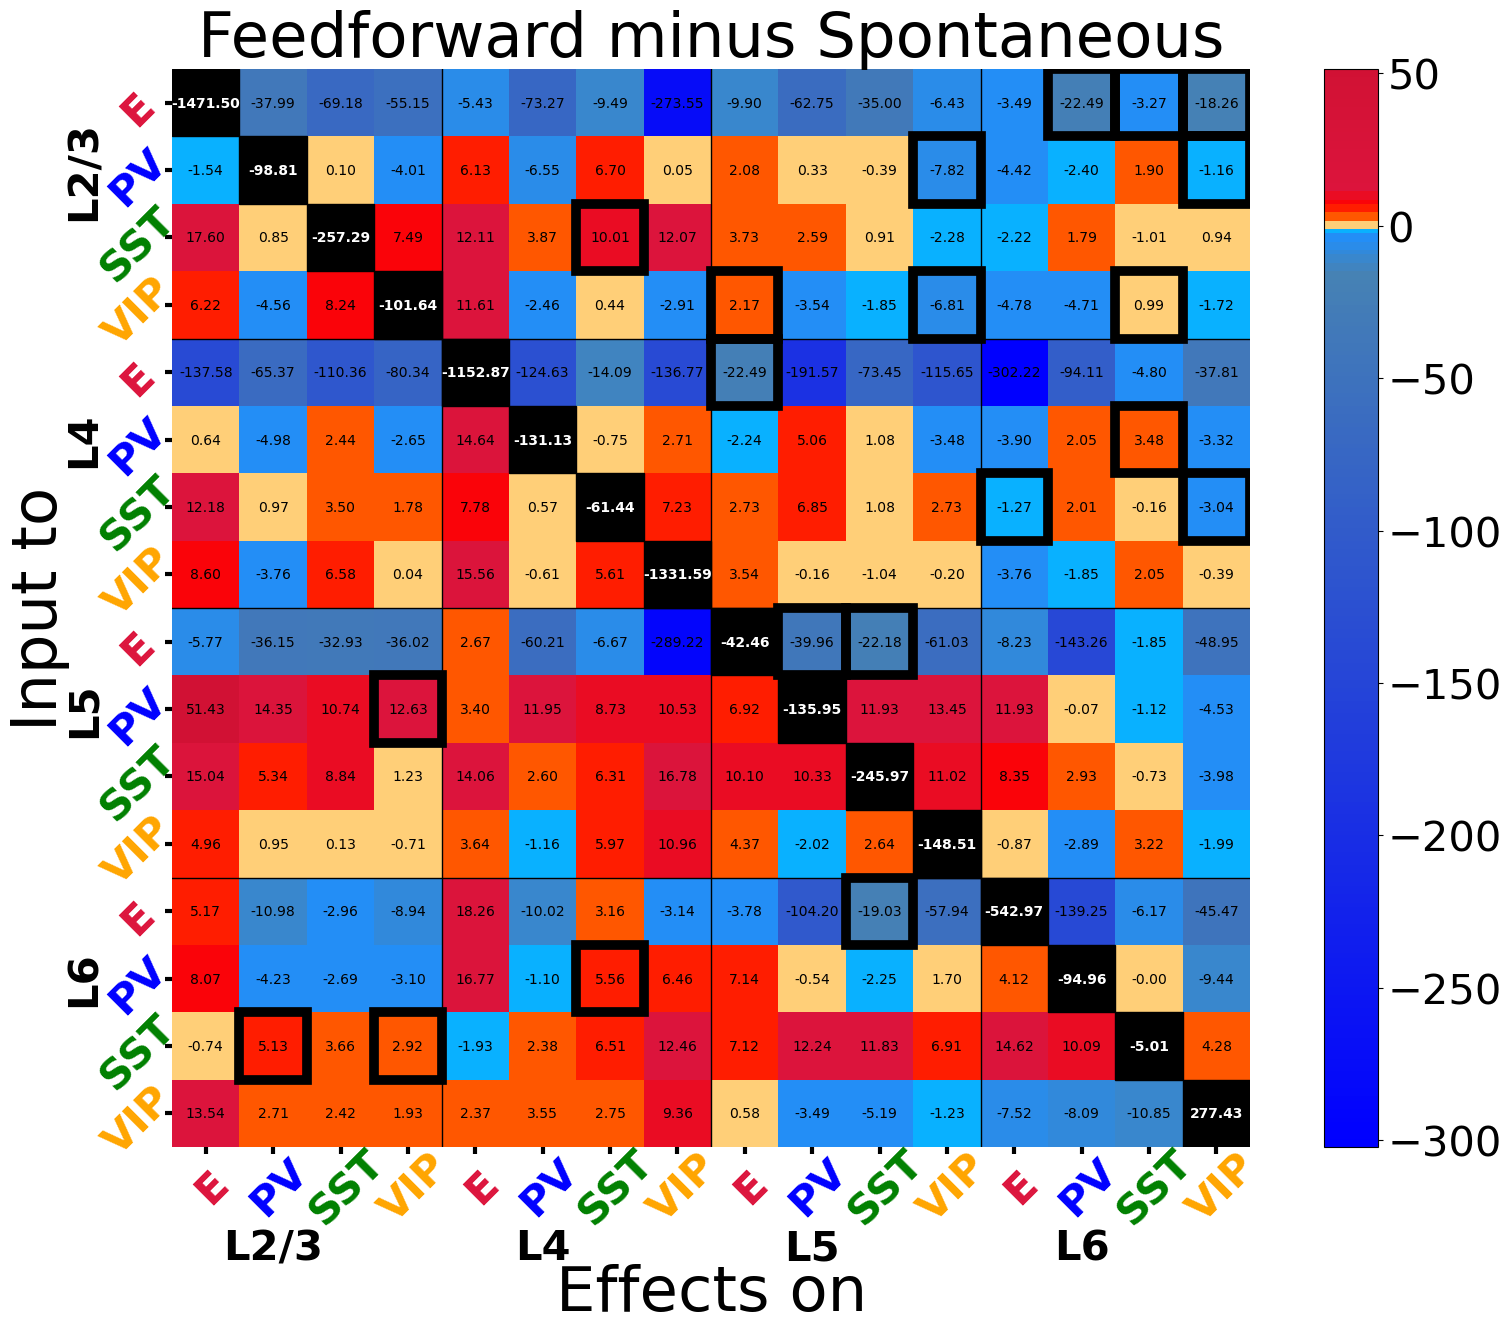

In [498]:
#I create the figure 
fig = plt.figure(figsize=(19, 14)) #create the figure

colors = [(0, 'blue'),
          (selected_values_neg_new[1], 'steelblue'),
          (selected_values_neg_new[2], 'dodgerblue'),
          (selected_values_neg_new[3], 'deepskyblue'),
          (selected_values_neg_new[4], 'lightblue'),
          (0.5, 'white'),
          (selected_values_new[0], 'orange'),
          (selected_values_new[1], 'orangered'),
          (selected_values_new[2], 'red'),
          (selected_values_new[3], 'crimson'), 
          (1, 'darkred')]




# colors = [(0, 'darkblue'),
#           (selected_values_neg_new[1], 'blue'),
#           (selected_values_neg_new[2], 'steelblue'),
#           (selected_values_neg_new[3], 'deepskyblue'),
#           (selected_values_neg_new[4], 'lightblue'),
#           (0.5, 'white'),
#           (selected_values_new[0], 'orange'),
#           (selected_values_new[1], 'orangered'),
#           (selected_values_new[2], 'red'),
#           (selected_values_new[3], 'crimson'), 
#           (1, 'darkred')]

matrix1=m_import_ff  
matrix2=m_import_base

highlight_mask = ((matrix1 > 0) & (matrix2 < 0)) | ((matrix1 < 0) & (matrix2 > 0))


# Create a colormap that maps the given colors to values between 0 and 1
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)

norm = plt.Normalize(vmin=np.nanmin(m_diff)*100, vmax=np.nanmax(m_diff)*100)


#norm = plt.Normalize(vmin=np.min(m_diff)*100, vmax=np.max(m_diff)*100)
#cmap='PRGn'
#cmap=custom_cmap
#Plot
mA_plot = sns.heatmap(np.array(m_diff)*100,annot=True,cmap=custom_cmap,norm=norm,center=0,square=True,cbar=False, linewidths=0.,fmt=".2f", annot_kws={"size": 10, "color": "black"}) # plot GH with heatmap

mA_plot.tick_params(axis='both', which='major', width=3, length=5)
mA_plot.set_xticklabels([])
mA_plot.set_yticklabels([])

# Define your labels and their positions
layer_labels = ['L2/3', 'L4', 'L5', 'L6']
x_positions = [1.5, 5.5, 9.5, 13.5]  # X positions for the labels, centered in each block of 4
y_positions = [1.5, 5.5, 9.5, 13.5]  # Y positions for the labels, centered in each block of 4


# Add black diagonal with original values as white text
for i in range(len(original_diagonal_values)):
    mA_plot.add_patch(plt.Rectangle((i, i), 1, 1, fill=True, color='black'))
    mA_plot.text(i+0.5, i+0.5, f'{original_diagonal_values[i]*100:.2f}', ha='center', va='center', color='white', fontsize=10, fontweight='bold')



# Add text labels for the X axis
for label, pos in zip(layer_labels, x_positions):
    plt.text(pos, 17.5, label, ha='center', va='center', fontsize=30, fontweight='bold')

# Add text labels for the Y axis
for label, pos in zip(layer_labels, y_positions):
    plt.text(-1.3, pos, label, ha='center', va='center', fontsize=30, fontweight='bold', rotation=90)

#Labels of the axis
cell_type_labels = ['E','PV','SST','VIP','E','PV','SST','VIP','E','PV','SST','VIP','E','PV','SST','VIP']
colors = ['crimson', 'blue', 'green', 'orange','crimson', 'blue', 'green', 'orange','crimson', 'blue', 'green', 'orange','crimson', 'blue', 'green', 'orange']
x_positions = np.arange(len(cell_type_labels))  # X positions for the labels

# Add colored text labels for the X axis
for label, color, pos in zip(cell_type_labels, colors, x_positions):
    #plt.text(pos+0.6, 16.6, label, ha='center', va='center', fontsize=27, rotation=45, fontweight='bold', color=color)
    #plt.text(-0.5, pos+0.6, label, ha='center', va='center', fontsize=27, rotation=45, fontweight='bold', color=color)

    plt.text(pos+0.6, 16.6, label, ha='center', va='center', fontsize=30, rotation=45, fontweight='bold', color=color)
    plt.text(-0.5, pos+0.6, label, ha='center', va='center', fontsize=30, rotation=45, fontweight='bold', color=color)

#Lines to guide the eye
for i in range(4, m_diff.shape[0], 4):  # Start at 4 and count by 4s
    plt.axhline(i, color='black', linewidth=1)  # Horizontal line
    plt.axvline(i, color='black', linewidth=1)  # Vertical line

cbar = mA_plot.figure.colorbar(mA_plot.collections[0])
cbar_pos = cbar.ax.get_position()

# Set the position of the label. Adjust the x and y values as needed.
#cbar.ax.text(4, -910,'% Change in Rates', rotation=90, va='bottom', ha='center', fontsize=45)

cax = mA_plot.figure.axes[-1]
cax.tick_params(labelsize=30)

#Labels of the axes
mA_plot.set_xlabel('Effects on', fontsize=45, labelpad=75)
mA_plot.set_ylabel('Input to', fontsize=45, labelpad=65)
plt.title('Feedforward minus Spontaneous',fontsize=45)

for i in range(highlight_mask.shape[0]):
    for j in range(highlight_mask.shape[1]):
        if highlight_mask[i, j]:
            plt.gca().add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='black', lw=7))


#Save the image
#plt.savefig('../IMAGES/fig2_matrix_diff_colors.png', bbox_inches='tight')
plt.savefig('../IMAGES/fig2_matrix_diff_colors_Blackblue.png', bbox_inches='tight')

plt.show(mA_plot)

-10
-10
